This code is used to generate 1 hour interpolated data from experimental data based on file `data_interp.py`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#%% Importing experimental data

file_dirc = r'../data/EVA2 calendar/'
file_name = ['60%SOC@45C','80%SOC@45C','100%SOC@45C',\
             '40%SOC@52,5C','60%SOC@52,5C','80%SOC@52,5C',\
             '60%SOC@60C','100%SOC@60C']

In [3]:
#%% Importing experimental data

file_dirc = r'../data/b0_sample/'
file_name =  ['temp-35_soc-80', 'temp-45_soc-100', 'temp-45_soc-60', 'temp-45_soc-80', 'temp-60_soc-100', 'temp-60_soc-60']

In [31]:
exp_data_dict= [dict() for x in range(len(file_name))]
for i in range(len(file_name)):
    exp_data = pd.read_csv(file_dirc + file_name[i] +'.csv').dropna()
    time_exp = exp_data['days']
    cap_loss_exp = exp_data['loss']
    maxt =  time_exp.iloc[-1]
    time = np.linspace(0,int(maxt)*24,int(maxt)*24+1)
    cap_loss = np.interp(time/24,time_exp,cap_loss_exp)
    exp_data_dict[i] = {'time':time,'cap_loss':cap_loss}
    np.savetxt(file_dirc+file_name[i]+'_interp.csv',np.array((time,cap_loss)).T,header = "Time[Hr],Cap_loss",delimiter = ',',comments = '')
    

In [32]:
exp_data_interp_dict= [dict() for x in range(len(file_name))]
for i in range(len(file_name)):
    exp_data = pd.read_csv(file_dirc + file_name[i] +'.csv')
    exp_data_dict[i] = {'time':exp_data['days'],'cap_loss':exp_data['loss']}
    exp_interp_data = pd.read_csv(file_dirc + file_name[i] +'_interp.csv')
    exp_data_interp_dict[i] = {'time':exp_interp_data['Time[Hr]'],'cap_loss':exp_interp_data['Cap_loss']}
 

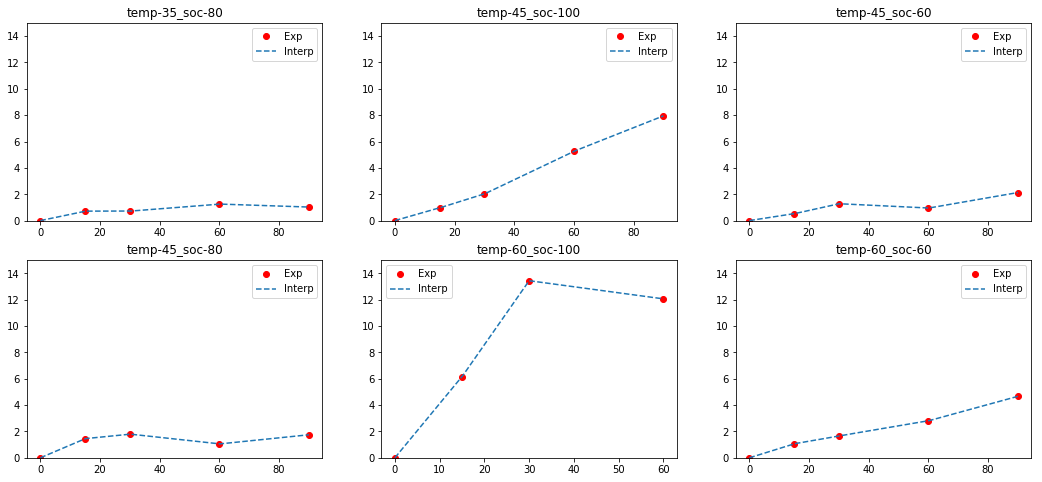

In [34]:
fig,axes = plt.subplots(2,3,figsize=(18,8))
axes = axes.flatten()
for i in range(len(file_name)):
    a = axes[i]
    a.plot(exp_data_dict[i]['time'],100- exp_data_dict[i]['cap_loss'], 'ro')
    a.plot(exp_data_interp_dict[i]['time']/24,100-exp_data_interp_dict[i]['cap_loss'],linestyle = '--')
    a.legend(('Exp','Interp'))
    a.set_title(file_name[i])
    a.set_ylim([0,15])